# End-to-End Exploratory Data Analysis (EDA) on the Titanic Dataset

**Project Objective:** To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Shreek195/titanic-survival-analysis/refs/heads/main/Titanic-Dataset.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Initial Data Inspection

In [44]:
df.shape

(891, 12)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The dataset contains 891 entries (passengers) and 12 columns.
- **Missing Values Identified:** `Age`, `Cabin`, and `Embarked` have missing values. `Cabin` is missing a significant amount of data (~77%), which will require special attention.

In [54]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

- **Survived:** About 38.4% of passengers in this dataset survived.
- **Age:** The age ranges from ~5 months to 80 years, with an average age of about 30.
- **Fare:** The fare is highly skewed, with a mean of 32 usd but a median of only 14.45 usd. The maximum fare is over $512, indicating the presence of extreme outliers.

### Data Cleaning

In [55]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [56]:
df.isnull().sum().to_frame(name='Missing Count')

Missing Count
PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2

In [60]:
# 1. Imputing AGE by median, because of outliers in age column
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

C:\Users\Koshti's\AppData\Local\Temp\ipykernel_6208\3507871185.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median, inplace=True)


In [61]:
# Verify AGE column for missing values
df['Age'].isnull().sum()

0

In [62]:
# 2. As the data we have is less so instead of removing we continue to impute the 2 rows with mode of EMBARKED column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify EMBARKED column for missing values
df['Embarked'].isnull().sum()

0

In [64]:
# 3.  With over 77% missing data, imputing is not a good idea. Instead, we'll create a new feature 'Has_Cabin'.
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop('Cabin', axis=1, inplace=True)

In [68]:
df['Has_Cabin'].value_counts().to_frame()

count
Has_Cabin       
0            687
1            204

In [69]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0

In [70]:
# Verify the missing values
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

### Univariate Analysis

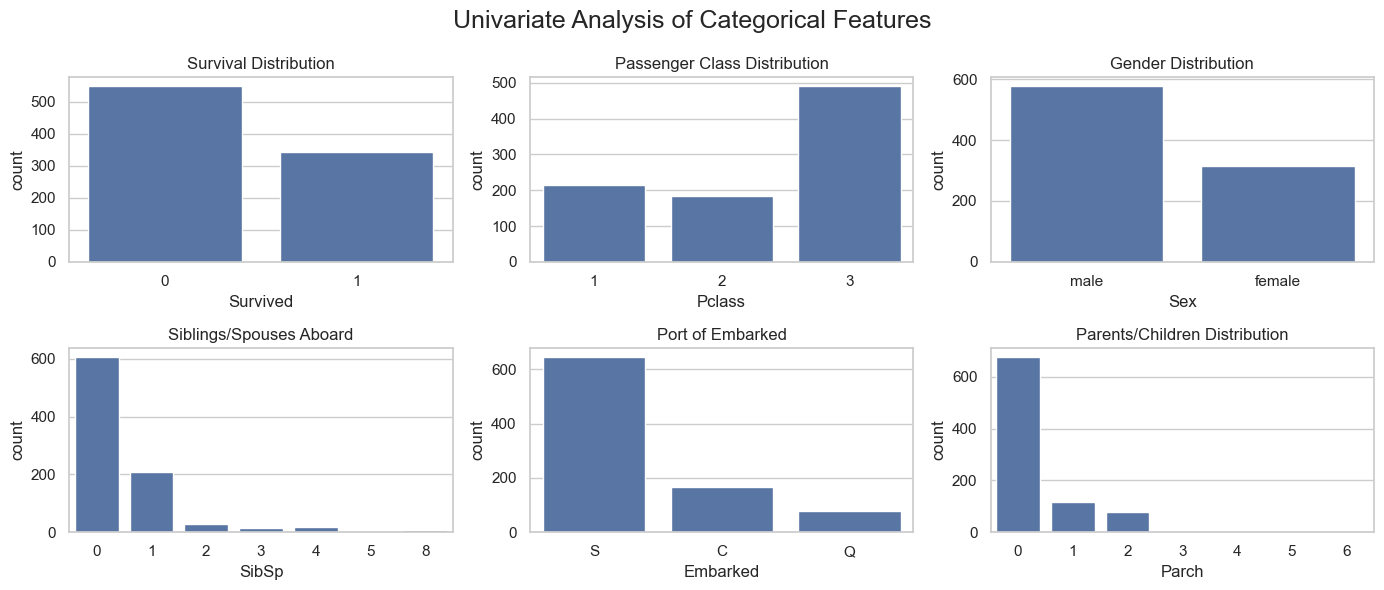

In [76]:
# Only Categorical Columns
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

fig.suptitle('Univariate Analysis of Categorical Features', fontsize=18)

sns.countplot(data=df, x='Survived', ax=axes[0, 0]).set_title('Survival Distribution')
sns.countplot(data=df, x='Pclass', ax=axes[0, 1]).set_title('Passenger Class Distribution')
sns.countplot(data=df, x='Sex', ax=axes[0, 2]).set_title('Gender Distribution')
sns.countplot(data=df, x='SibSp', ax=axes[1, 0]).set_title('Siblings/Spouses Aboard')
sns.countplot(data=df, x='Embarked', ax=axes[1, 1]).set_title('Port of Embarked')
sns.countplot(data=df, x='Parch', ax=axes[1, 2]).set_title('Parents/Children Distribution')

plt.tight_layout()
plt.show()

- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.

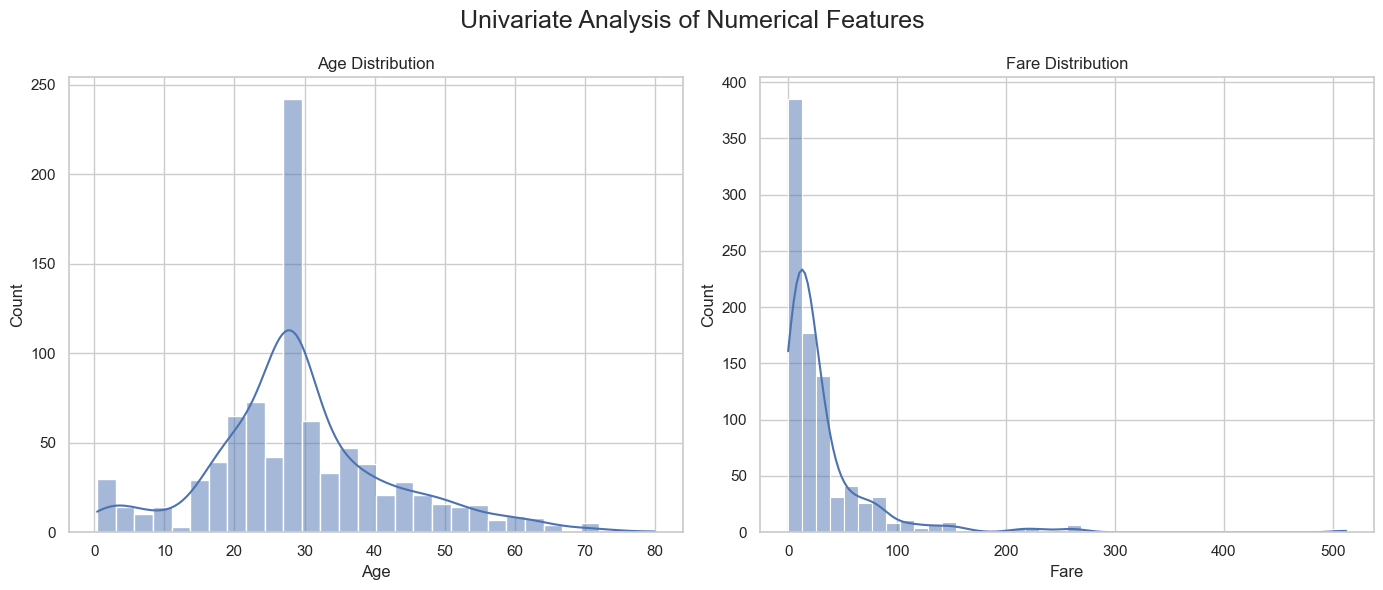

In [77]:
# Only Numerical columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Univariate Analysis of Numerical Features', fontsize=18)

sns.histplot(data=df, x='Age', kde=True, bins=30, ax=axes[0]).set_title('Age Distribution')
sns.histplot(data=df, x='Fare', kde=True, bins=40, ax=axes[1]).set_title('Fare Distribution')

plt.tight_layout()
plt.show()

- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

### Bivariate Analysis

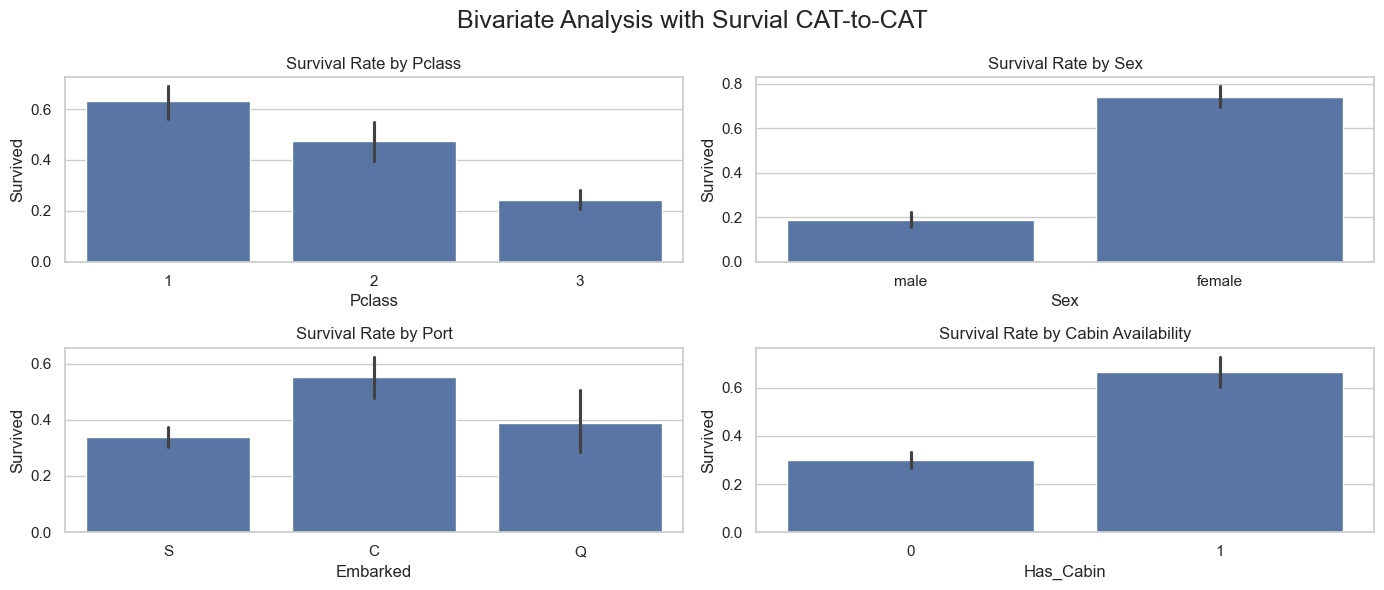

In [78]:
# Categorical vs Categorical
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.suptitle('Bivariate Analysis with Survial CAT-to-CAT', fontsize=18)

sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0, 0]).set_title('Survival Rate by Pclass')
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0, 1]).set_title('Survival Rate by Sex')
sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[1, 0]).set_title('Survival Rate by Port')
sns.barplot(data=df, x='Has_Cabin', y='Survived', ax=axes[1, 1]).set_title('Survival Rate by Cabin Availability')

plt.tight_layout()
plt.show()

Those black lines are called confidence intervals.

In a bar plot that shows the mean (like the survival rate here, which is the mean of the 0s and 1s in the 'Survived' column), the confidence interval represents the range within which the true mean is likely to fall. A shorter line indicates less uncertainty about the mean, while a longer line indicates more uncertainty.

Seaborn automatically calculates and displays these 95% confidence intervals when you use barplot.

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

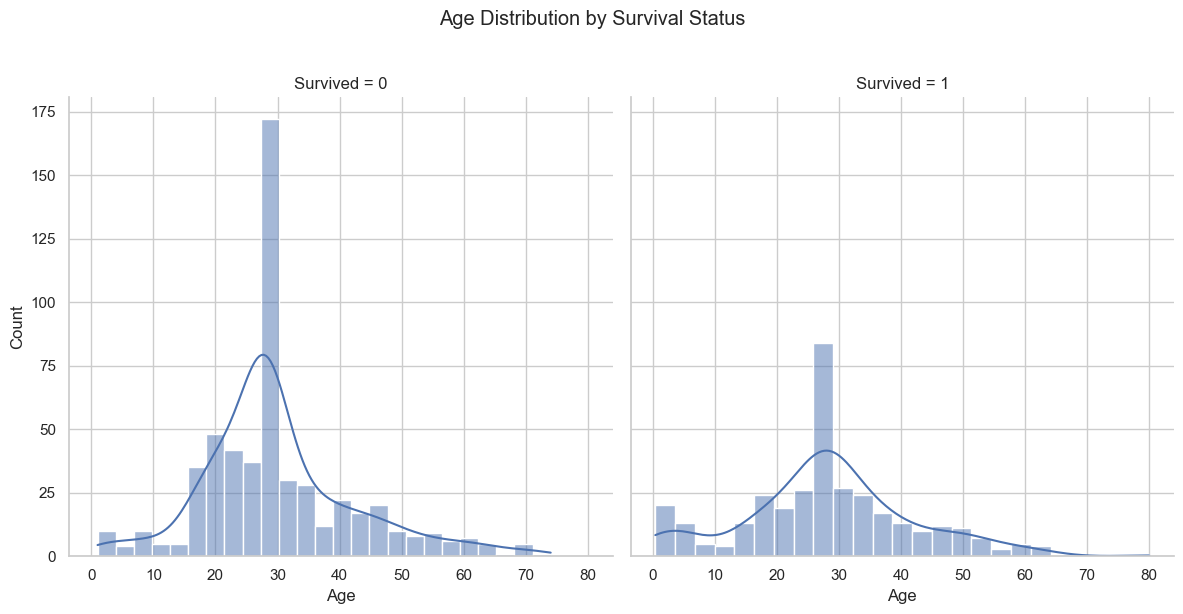

In [79]:
# Age vs Survival
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)

plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.tight_layout()
plt.show()

- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

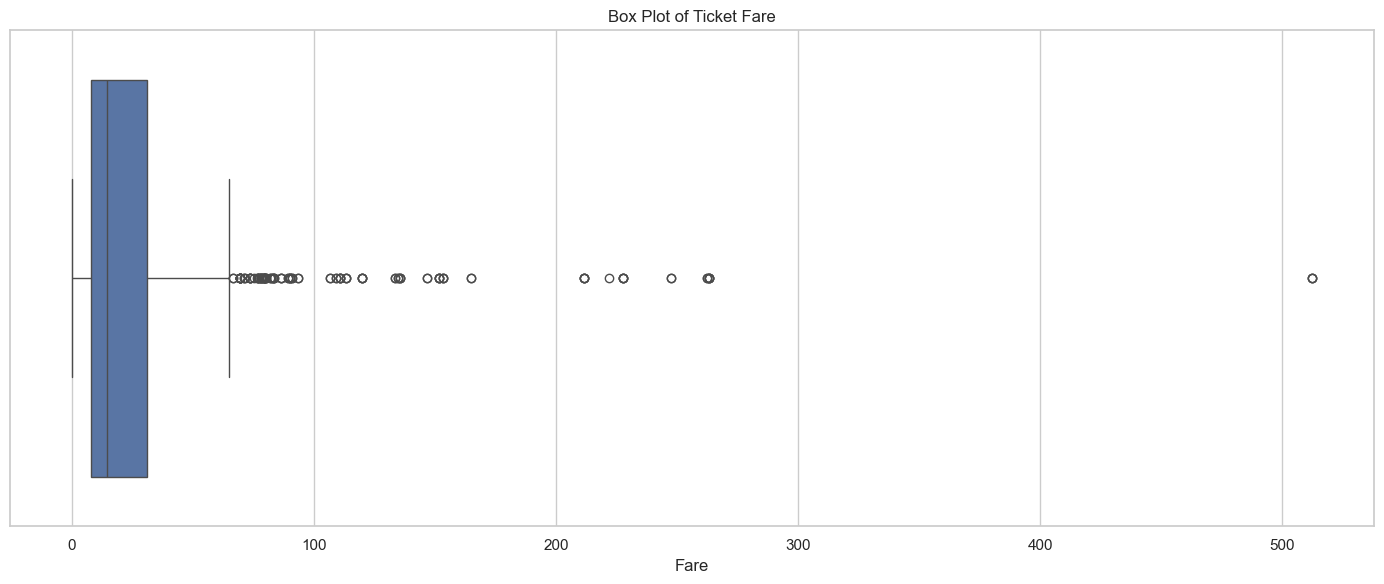

In [80]:
# Fare Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Fare')
plt.title('Box Plot of Ticket Fare')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()

The box plot confirms the presence of significant outliers. Most fares are concentrated below 100usd, but there are several fares extending far beyond, with some even exceeding 500usd. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

### Feature Engineering

In [81]:
# 1. Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1   # +1 for the person itself

In [82]:
# 2. Create an 'isAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [84]:
df[['FamilySize', 'IsAlone']].head()

FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

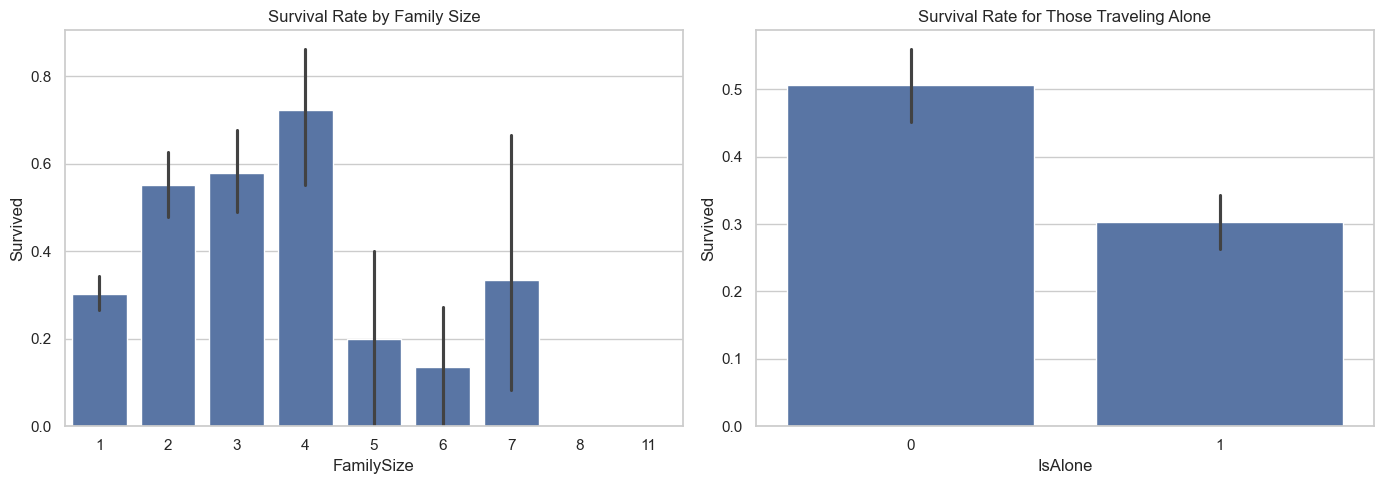

In [85]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df, x='FamilySize', y='Survived', ax=axes[0]).set_title('Survival Rate by Family Size')
sns.barplot(data=df, x='IsAlone', y='Survived', ax=axes[1]).set_title('Survival Rate for Those Traveling Alone')

plt.tight_layout()
plt.show()

- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

* Matches a space.
* Titles in the names are usually preceded by a space.
([A-Za-z]+): This is the capturing group.
* [A-Za-z]+: Matches one or more uppercase or lowercase letters. This captures the title itself (like Mr, Mrs, Miss, etc.).
* \.: Matches a literal dot (.) which usually follows the title.

In [86]:
# 3. Extract 'Title' from the 'Name'column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Lets see the difference titles
print('Extracted Titles: ')
df['Title'].unique()

Extracted Titles: 


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

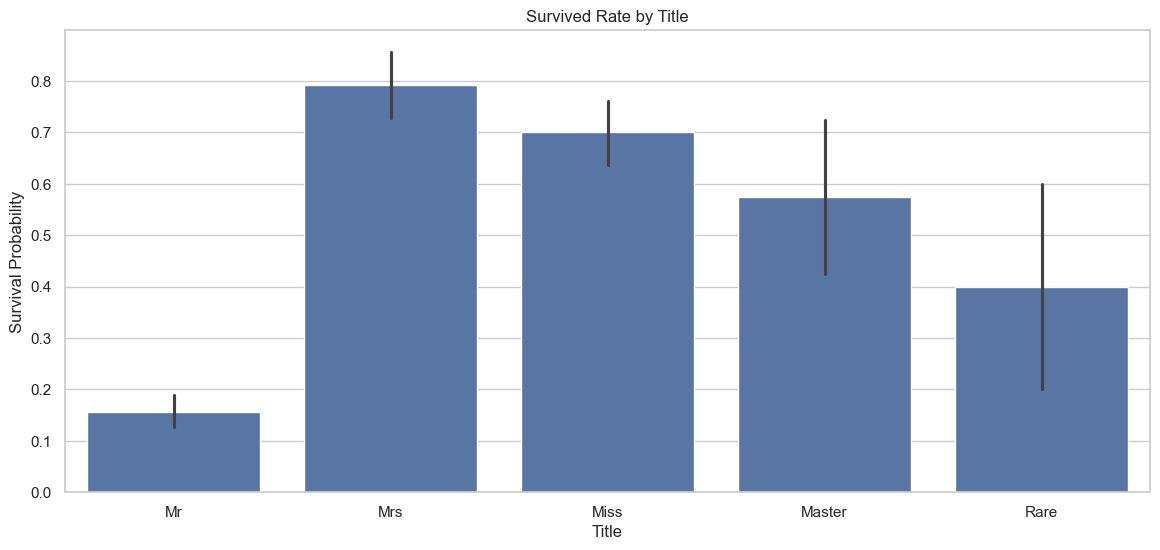

In [87]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Visualize
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Title', y='Survived')
plt.title('Survived Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

### Multivariate Analysis

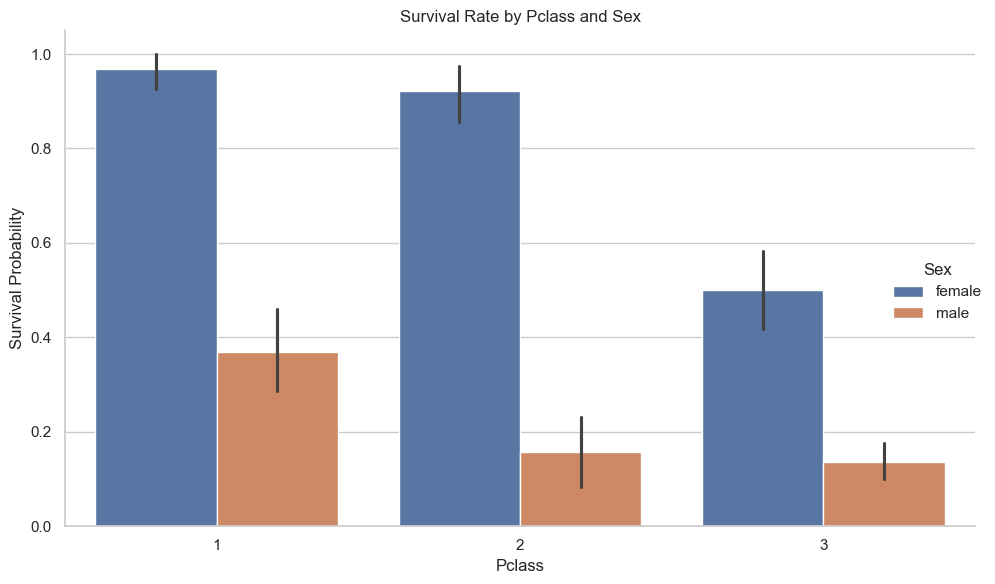

In [88]:
# Survival rate by Pclass and Sex
sns.catplot(data=df, x='Pclass', y='Survived', hue='Sex', kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')

plt.tight_layout()
plt.show()

- Females in all classes had a significantly higher survival rate than males.

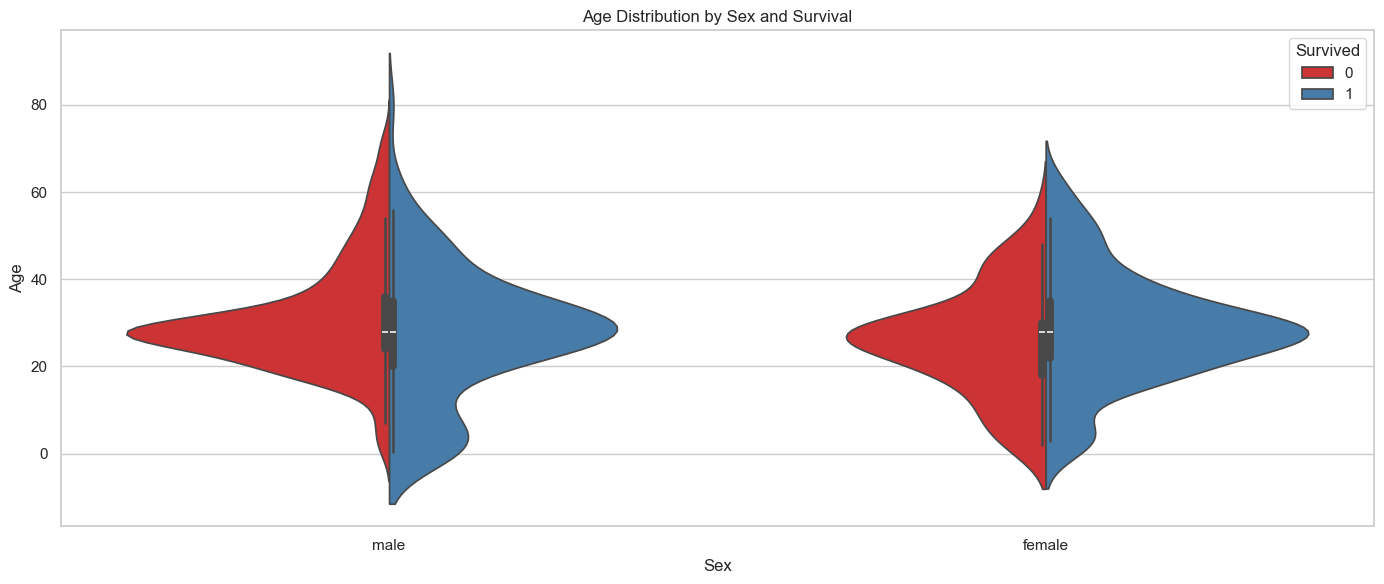

In [90]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True, palette='Set1')
plt.title('Age Distribution by Sex and Survival')
plt.tight_layout()
plt.show()

- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

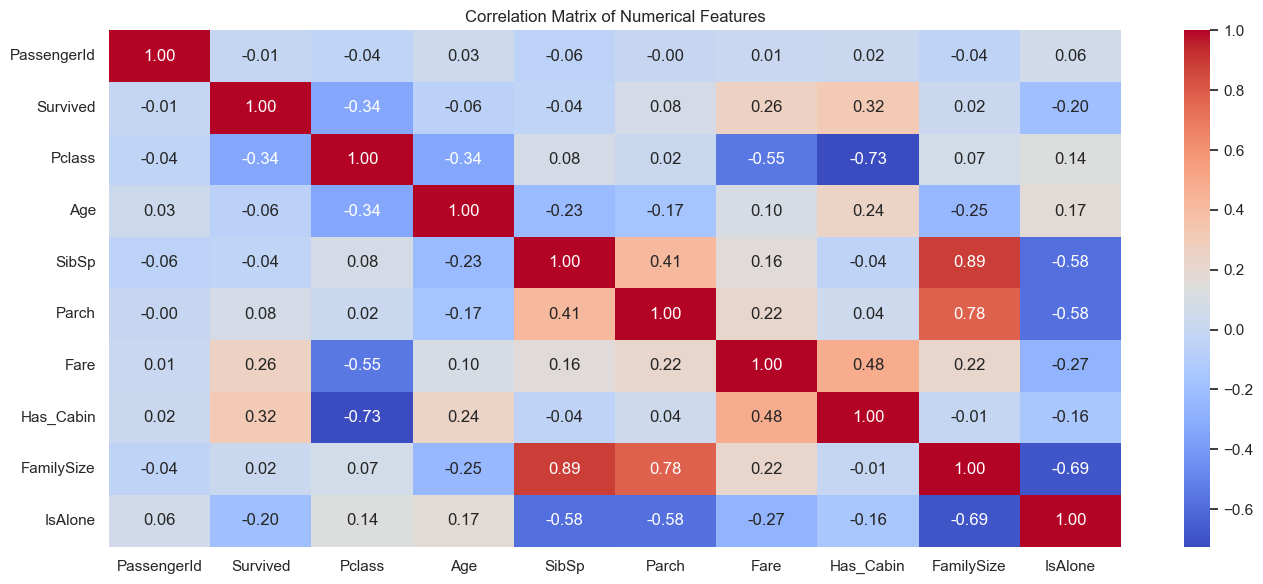

In [92]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 6))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

plt.tight_layout()
plt.show()

- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

## Using Profiling to Generate the HTML Report

In [94]:
# Install ydata-profiling
!pip install ydata-profiling -q


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 51.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [96]:
# Save the report to an HTML file
profile.to_file("y_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]